# LIGHT

## light-1

In [ ]:
# установил на ubuntu докер и tf-serving latest-gpu. Не знаю какпоказать этой в ноутбуке, кроме как вывести список
# контейнеров и образов

In [ ]:
!pkexec docker ps


CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


In [ ]:
!pkexec docker images

REPOSITORY               TAG          IMAGE ID       CREATED         SIZE
tensorflow/serving       latest-gpu   6dabf2c0a340   2 months ago    8.43GB
nvidia/cuda              11.0-base    2ec708416bb8   5 months ago    122MB
docker/getting-started   latest       3c156928aeec   9 months ago    24.8MB
hello-world              latest       bf756fb1ae65   13 months ago   13.3kB


## light-2

In [ ]:
import sys
from matplotlib import pyplot
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import numpy
import json
import os

In [ ]:

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
    return model, testX, testY

# entry point, run the test harness

model, testX, testY = run_test_harness()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
781/781 [==============================] - 16s 20ms/step - loss: 2.1640 - accuracy: 0.2928 - val_loss: 1.4849 - val_accuracy: 0.4598
Epoch 2/100
781/781 [==============================] - 16s 20ms/step - loss: 1.6379 - accuracy: 0.4048 - val_loss: 1.5652 - val_accuracy: 0.4331
Epoch 3/100
781/781 [==============================] - 16s 20ms/step - loss: 1.5150 - accuracy: 0.4486 - val_loss: 1.4063 - val_accuracy: 0.4842
Epoch 4/100
781/781 [==============================] - 16s 20ms/step - loss: 1.4326 - accuracy: 0.4795 - val_loss: 1.4115 - val_accuracy: 0.4908
Epoch 5/100
781/781 [==============================] - 16s 20ms/step - loss: 1.3744 - accuracy: 0.5029 - val_loss: 1.2650 - val_accuracy: 0.5375
Epoch 6/100
781/781 [==============================] - 16s 20ms/step - loss: 1.3182 - accuracy: 0.5242 - val_loss: 1.2276 - val_accuracy: 0.5557
Epoch 7/100
781/781 [==============================] -

In [ ]:

MODEL_DIR = '/home/prop/Документы/HW/35/cifar10'# создание временной директории для хранения модели
version = 1  # номер нашей версии
export_path = os.path.join(MODEL_DIR, str(version)) 
print('Путь для экспорта = {}\n'.format(export_path))

Путь для экспорта = /home/prop/Документы/HW/35/cifar10/1



In [ ]:
if os.path.isdir(export_path):
  print('\nМодель уже сохранена\n')
  !rm -r {export_path}


Модель уже сохранена



In [ ]:

tensorflow.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nСохраненная модель:')
!pkexec ls -l {export_path}

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/prop/Документы/HW/35/cifar10/1/assets

Сохраненная модель:
итого 560
drwxr-xr-x 2 prop prop   4096 фев 15 23:06 assets
-rw-rw-r-- 1 prop prop 564929 фев 15 23:06 saved_model.pb
drwxr-xr-x 2 prop prop   4096 фев 15 23:06 variables


## light-3

In [ ]:
!saved_model_cli show --dir {export_path} --all

2021-02-15 02:08:07.487356: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_18_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 32, 32, 3)
        name: serving_default_conv2d_18_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_7'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name 

## light-4

In [ ]:
!pkexec docker ps


CONTAINER ID   IMAGE                          COMMAND                  CREATED          STATUS          PORTS                              NAMES
cdb0c4ae3562   tensorflow/serving:2.2.2-gpu   "/usr/bin/tf_serving…"   58 seconds ago   Up 57 seconds   8500/tcp, 0.0.0.0:8501->8501/tcp   gifted_allen


In [ ]:
проверим работу предсказания

In [ ]:

data = json.dumps({"instances": testX[0:1].tolist()})
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/cifar10:predict', data=data, headers=headers)


In [ ]:
print( json.loads(json_response.text))

{'predictions': [[9.04502958e-05, 0.000237729357, 0.00124874688, 0.94063127, 0.000116333365, 0.0289377887, 0.0282709245, 5.00830502e-05, 0.000358571793, 5.80722626e-05]]}


In [ ]:
predictions = json.loads(json_response.text)['predictions']
print('predict: ', numpy.argmax(predictions[0]), 'fact:', numpy.argmax(testY[0]))

predict:  3 fact: 3


## light-5

In [ ]:
возьмем функцию по построению множества Мандельброта

3.4089945089999674


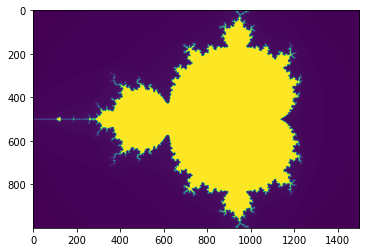

In [ ]:
# сначала без numba
from timeit import default_timer as timer
try:
    from matplotlib.pylab import imshow, show
    have_mpl = True
except ImportError:
    have_mpl = False
import numpy as np
from numba import jit

def mandel_no(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255


def create_fractal_no(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel_no(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal_no(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print(e - s)
if have_mpl:
    imshow(image)
    show()

0.2149448959989968


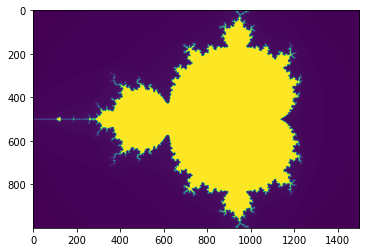

In [ ]:
# применяем декаратор
@jit(nopython=True)
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 4:
            return i

    return 255

@jit(nopython=True)
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print(e - s)
if have_mpl:
    imshow(image)
    show()

In [ ]:
# 3.4 секунды проти 0.21

# PRO

для задания взята база по регрессии с минами

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import numpy as np

import matplotlib.pyplot as plt
import json
import requests
import os
import pandas as pd
# from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from random import randint
print('success')

success


In [ ]:
df = pd.read_csv('sonar2.csv', header=None, encoding = 'utf8')
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
dataset = df.values


In [ ]:
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]


In [ ]:
Y[Y=='R']='0'
Y[Y=='M']='1'


In [ ]:
Y = Y.astype(int)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle = True)

In [ ]:
x_train

array([[0.0305, 0.0363, 0.0214, ..., 0.0042, 0.0055, 0.0021],
       [0.0195, 0.0142, 0.0181, ..., 0.0042, 0.0067, 0.0012],
       [0.0968, 0.0821, 0.0629, ..., 0.0201, 0.021 , 0.0041],
       ...,
       [0.0093, 0.0269, 0.0217, ..., 0.0116, 0.006 , 0.011 ],
       [0.0079, 0.0086, 0.0055, ..., 0.0058, 0.0059, 0.0032],
       [0.0131, 0.0201, 0.0045, ..., 0.0066, 0.0029, 0.0053]])

In [ ]:

model = Sequential()
model.add(BatchNormalization(input_shape=(60,)))


model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization())


model.add(Dense(60, activation='softmax'))
model.add(Dropout(0.4))

model.add(Dense(30, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=0.004), metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_split=0.05)
scores = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 29ms/step - loss: 0.6861 - accuracy: 0.5796 - val_loss: 0.6960 - val_accuracy: 0.1111
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.7070 - val_loss: 0.6870 - val_accuracy: 0.8889
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.7834 - val_loss: 0.6708 - val_accuracy: 0.8889
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.8217 - val_loss: 0.6655 - val_accuracy: 0.8889
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.8153 - val_loss: 0.6518 - val_accuracy: 0.8889
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.8471 - val_loss: 0.6495 - val_accuracy: 0.8889
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4640 - accuracy: 0.8153 - val_loss: 0.6379 - val_accuracy: 0.8889
Epoch 8/100
5/5 [=========

In [ ]:

MODEL_DIR = '/home/prop/Документы/HW/35/sonar'# создание временной директории для хранения модели
version = 1  # номер нашей версии
export_path = os.path.join(MODEL_DIR, str(version)) 
print('Путь для экспорта = {}\n'.format(export_path))

Путь для экспорта = /home/prop/Документы/HW/35/sonar/1



In [ ]:

tensorflow.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nСохраненная модель:')
!pkexec ls -l {export_path}

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/prop/Документы/HW/35/sonar/1/assets

Сохраненная модель:
итого 296
drwxr-xr-x 2 prop prop   4096 фев 16 00:12 assets
-rw-rw-r-- 1 prop prop 291990 фев 16 00:12 saved_model.pb
drwxr-xr-x 2 prop prop   4096 фев 16 00:12 variables


In [ ]:

data = json.dumps({"instances": x_test[0:1].tolist()})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/sonar:predict', data=data, headers=headers)


print( json.loads(json_response.text))


{'predictions': [[0.937156498]]}


In [ ]:

predictions = json.loads(json_response.text)['predictions']
print('predict: ', predictions[0], 'fact:', y_test[0])

predict:  [0.937156498] fact: 1


In [ ]:
# предсказание 0,93, факт - 1, сеть правильно определила мину